In [ ]:
import psycopg2
import sys
import re


import numpy as np
import pandas as pd
from scipy import stats, integrate

%matplotlib inline
import matplotlib.pyplot as plt


# Define our connection string
conn_string = "host='52.43.75.12' port='5432' dbname='ndexstats' user='ndexstats' password='dashboard101'"

# print the connection string we will use to connect
# print "Connecting to database\n\t->%s" % (conn_string)

# get a connection, if a connect cannot be made an exception will be raised here
try:
    conn = psycopg2.connect(conn_string)
except:
    e = sys.exc_info()[0]
    print "Error: %s" % e 
    sys.exit()


# conn.cursor will return a cursor object for performing queries
cursor = conn.cursor()


query1 = "select count(transaction_id), transaction_hour from ndexstats where api='NetworkAService.getEdges' " + \
    " and transaction_year='2016' and transaction_month='7' and transaction_day='20' " + \
    " group by transaction_hour order by transaction_hour"

query2 = "select count(transaction_id), transaction_hour from ndexstats where api='NetworkAService.getCompleteNetworkAsCX' " + \
    " and transaction_year='2016' and transaction_month='7' and transaction_day='20' " + \
    " group by transaction_hour order by transaction_hour"

query3 = "select count(transaction_id), transaction_hour from ndexstats where api='NetworkAService.queryNetwork' " + \
    " and transaction_year='2016' and transaction_month='7' and transaction_day='20' " + \
    " group by transaction_hour order by transaction_hour"

getEdges = {}
getCompleteNetworkAsCX = {}
queryNetwork = {}

cursor.execute(query1)
for i in range(cursor.rowcount):
    row = cursor.fetchone()
    hour = row[1]
    count = row[0]
    getEdges[hour] = count

cursor.execute(query2)
for i in range(cursor.rowcount):
    row = cursor.fetchone()
    hour = row[1]
    count = row[0]
    getCompleteNetworkAsCX[hour] = count

cursor.execute(query3)
for i in range(cursor.rowcount):
    row = cursor.fetchone()
    hour = row[1]
    count = row[0]
    queryNetwork[hour] = count

cursor.close()
conn.close()

getCompleteNetworkAsCXSeries = pd.Series(getCompleteNetworkAsCX); 


API_Stats = {'Hours' : [n for n in range(0, 24)],
            'getEdges' : [getEdges.get(n) for n in range(0,24)],
            'getCompleteNetworkAsCX' : [getCompleteNetworkAsCX.get(n) for n in range(0,24)],
            'queryNetwork' : [queryNetwork.get(n) for n in range(0,24)]
            }


API_Stats_show = pd.DataFrame(API_Stats, index=API_Stats['Hours'], 
                              columns=['getEdges', 'getCompleteNetworkAsCX', 'queryNetwork'])

API_Stats_show.plot(kind='bar', grid=True, colormap='autumn', alpha=0.5, figsize=(16,8),\
                   title='getEdges and getComplete NetworkAsCX API Calls for July 20, 2016', \
                   width=.8, linewidth=1.2, stacked=True)

plt.xlabel('Hours')
plt.ylabel('No of Calls')


In [ ]:
import psycopg2
import sys
import re


import numpy as np
import pandas as pd
from scipy import stats, integrate

%matplotlib inline
import matplotlib.pyplot as plt


'''
Parameters for eventsOverTime():
--------------------------------
1) filter:  API(s)
            application type (i.e., firefox, chrome, python client, etc.) 
            user (anonymous or authenticated) 
            user owning
            group owning 
            network type 
            netwrok collection (i.e., all networks in Cancer Clearinghouse, etc.)

2) time_frame:  day (08/19/2016) 
                month (07/2016) 
                year (2016) 
                quarter (Q2 2016)
                
3) period:  hour 
            day 
            week
            month
'''
def eventsOverTime(filter): #, time_frame, period):
    
    if (filter is None):
        return None
    
    apiWhereClause = [];
    accountWhereClause = [];
    
    print filter
    
    # parse filter and build list of SQL "where" clauses we'll use in queries
    for key, value in filter.iteritems():
        if (key == 'api'):
            if type(value) is list:
                for api in value:
                    apiWhereClause.append("api = '" + api + "'")
            elif type(value) is str:
                apiWhereClause.append("api = '" + value + "'")
        elif (key == 'account'):
            if type(value) is list:
                for user in value:
                    accountWhereClause.append("account = '" + user + "'")
            elif type(value) is str:
                accountWhereClause.append("account = '" + value + "'")
    
    
    # Define our connection string
    conn_string = "host='52.43.75.12' port='5432' dbname='ndexstats' user='ndexstats' password='dashboard101'"

    # print the connection string we will use to connect
    # print "Connecting to database\n\t->%s" % (conn_string)

    # get a connection, if a connect cannot be made an exception will be raised here
    try:
        conn = psycopg2.connect(conn_string)
    except:
        e = sys.exc_info()[0]
        print "Error: %s" % e 
        sys.exit()


    # conn.cursor will return a cursor object for performing queries
    cursor = conn.cursor()


    API_Stats = {'Hours' : [n for n in range(0, 24)]}
    columnHeaders = [];
    #print apiWhereClause, accountWhereClause;
    
    
    
    #l = [1, 5, 8]
    #sql_query = 'select name from studens where id in (' + ','.join(map(str, l)) + ')'
    
    if apiWhereClause: 
        for where in apiWhereClause:
            query = "select count(transaction_id), transaction_hour from ndexstats where " + \
                        where + " and transaction_year='2016' and transaction_month='7' and transaction_day='20' " + \
                " group by transaction_hour order by transaction_hour"

            print query
            cursor.execute(query)
            queryCount = {}

            for i in range(cursor.rowcount):
                row = cursor.fetchone()
                hour = row[1]
                count = row[0]
                queryCount[hour] = count

            apiFullName = where.replace("'","").split('=')[1]
            apiName = apiFullName.split('.')[1]
            #print "apiFullName=", apiFullName, " apiName = ", apiName

            API_Stats[apiName] = [queryCount.get(n) for n in range(0,24)]
            print API_Stats

            columnHeaders.append(apiName);
            
    elif accountWhereClause: 
        for where in accountWhereClause:
            query = "select count(transaction_id), transaction_hour from ndexstats where " + \
                    where + " and transaction_year='2016' and transaction_month='7' and transaction_day='19' " + \
            " group by transaction_hour order by transaction_hour"

            #print query
            cursor.execute(query)
            queryCount = {}

            for i in range(cursor.rowcount):
                row = cursor.fetchone()
                hour = row[1]
                count = row[0]
                queryCount[hour] = count
                
            #print 'where=', where

            userName = where.replace("'","").split('=')[1]
            #apiName = apiFullName.split('.')[1]

            API_Stats[userName] = [queryCount.get(n) for n in range(0,24)]
            print API_Stats

            columnHeaders.append(userName);
            
   
        #getCompleteNetworkAsCXSeries = pd.Series(getCompleteNetworkAsCX); 
            
   
        #getCompleteNetworkAsCXSeries = pd.Series(getCompleteNetworkAsCX); 
    
    print API_Stats
    
    API_Stats_show = pd.DataFrame(API_Stats, index=API_Stats['Hours'], \
                columns=columnHeaders)

    print API_Stats_show
    
    cursor.close()
    conn.close()
    
    return API_Stats_show
    
'''
    API_Stats = {'Hours' : [n for n in range(0, 24)],
                'getEdges' : [getEdges.get(n) for n in range(0,24)],
                'getCompleteNetworkAsCX' : [getCompleteNetworkAsCX.get(n) for n in range(0,24)],
                'queryNetwork' : [queryNetwork.get(n) for n in range(0,24)]
                }

    API_Stats_show = pd.DataFrame(API_Stats, index=API_Stats['Hours'], 
                                  columns=['getEdges', 'getCompleteNetworkAsCX', 'queryNetwork'])
'''



if __name__ == "__main__":
    
    filter = {};
    
    #filter['api'] = ['NetworkAService.getEdges', "NetworkAService.getProvenance", ]
    filter['account'] = ['anonymous', 'drh', 'keiono']
        
    dataFrame = eventsOverTime(filter)
    
    if dataFrame is None:
        print ('dataFrame is None')
    else:
        dataFrame.plot(kind='bar', grid=True, colormap='autumn', alpha=0.5, figsize=(16,8),\
                       title='getEdges and getComplete NetworkAsCX API Calls for July 20, 2016', \
                       width=.8, linewidth=1.2, stacked=True)

        plt.xlabel('Hours')


In [3]:
import psycopg2
import sys
import re

import numpy as np
import pandas as pd
from scipy import stats, integrate

from pandas.io import sql
from pandas.io.sql import read_sql


def parseParamsAndBuildInClause(listOfArgs):
    retString = "("
    if type(listOfArgs) is str:
        retString =  retString + "'" + listOfArgs + "')"
    elif type(listOfArgs) is list:
        for arg in listOfArgs:
            retString = retString + "'" + arg + "', "

        retString = retString[:-2]
        retString += ")"

    return retString


def generateWhereClause(filter, primarySearchColumn):
    retStatement = [];
    
    primary = filter[primarySearchColumn];
    #print "In filter before deleting = ", filter,
    
    primaryWhere = primarySearchColumn + " in " + parseParamsAndBuildInClause(filter[primarySearchColumn])
    del filter[primarySearchColumn]
    del filter['primary']
    #print "In filter after deleting = ", filter
    
    whereClauses = [];
    for key in filter:
        whereClause = key + " in " + parseParamsAndBuildInClause(filter[key])
        whereClauses.append(whereClause)
        
    #print "in generateWhereClause: \nprimaryWhere=", primaryWhere + "\nwhereClauses=", whereClauses
    
    whereClause = ""
    for clause in whereClauses:
        whereClause = whereClause + clause + " and "

    #print "whereClause before = ", whereClause
    if len(whereClause) > 1:
        whereClause = whereClause[:-4]
        whereClause = " and " + whereClause
    
    
    #print "whereClause after = ", whereClause  
        
    return primaryWhere, whereClause



'''
Parameters for eventsOverTime():
--------------------------------
1) filter:  API(s)
            account (anonymous or authenticated) 
            application type (i.e., firefox, chrome, python client, etc.) 
            user owning
            group owning 
            group member access
            network type 
            network collection (i.e., all networks in Cancer Clearinghouse, etc.)

2) timeFrame:  day (08/19/2016) 
               month (07/2016) 
               year (2016) 
               quarter (Q2 2016)
                
3) breakBy:  hour 
             day 
             week
             month
'''
def eventsOverTime(filter, timeFrame, breakBy):
   
    if ((filter is None) or (timeFrame is None) or (breakBy is None)):
        return None
    
    # check timeFrame arg
    # print "filter =", filter, " timeFrame =", timeFrame, " breakBy =", breakBy
    
    if ('primary' not in filter):
        print "no 'primary' key in filter; keys in filter =", filter.keys()
        return None          
    
    if (len(timeFrame.keys()) > 1):
        print "more than one entry in timeFrame arg: ", timeFrame
        return None
    
    
    timeFrameKey = timeFrame.keys()[0]
    timeFrameValue = timeFrame.get(timeFrameKey)
    
    if (timeFrameKey not in ["day", "month", "year"]):
        print "wrong value for timeFrame arg: ", timeFrameKey, "; valid values are 'day', 'month', 'year'"
        return None 
    try:
        year, month, day = timeFrameValue.split("-")
    except:
        print "wrong format for timeFrame arg: ", timeFrameValue, "; valid format is timeFrame['" + \
        timeFrameKey + "']='YYYY-MM-DD'"
        return None


    if timeFrameKey == 'day':
        transactionInterval = "and transaction_year = '" + year + "' and transaction_month='" + month + \
        "' and transaction_day = '" + day + "'"
        #print "transactionInterval = ", transactionInterval
    elif timeFrameKey == 'month':
        transactionInterval = "and transaction_year = '" + year + "' and transaction_month='" + month + "'"
        #print "transactionInterval = ", transactionInterval
    elif timeFrameKey == 'year':
        transactionInterval = "and transaction_year = '" + year + "'"
    
    
    if (breakBy not in ["hour", "day", "week", "month"]):
        print "wrong value for breakBy arg: ", breakBy
        return None
    
    transactionBreakBy = "transaction_hour"
    if breakBy == 'day':
        transactionBreakBy = "transaction_day"
        
    #elif breakBy == 'week':
    #    transactionBreakBy = 'transaction_day' 
        
    elif breakBy == 'month':
        transactionBreakBy = "transaction_month"                
    
    
    primarySearchColumn = filter['primary'];
    #print 'primarySearchColumn = ', primarySearchColumn
    
    if type(primarySearchColumn) is list:
        if (len(primarySearchColumn) > 1):
            print "filter['primary'] should be a string or list with one element; but it is =", filter['primary']
            return None
        else:
            primarySearchColumn = filter['primary'][0]

    if primarySearchColumn not in filter:
        print "filter['primary']=", filter['primary'], "; '" +  primarySearchColumn + \
            "' not a key in filter; filter=", filter
        return None
    
    #validSearchColumns = ['api', 'account', 'applicationType', 'userOwning', \
    #                     'groupOwning', 'groupMemberAccess', 'networkType', 'networkCollection']
    
    validSearchColumns = ['api', 'account']
    if primarySearchColumn not in validSearchColumns:
        print "filter['primary']=", filter['primary'], " '" + primarySearchColumn + \
        "' is not valid search column; select one from the list: ", \
            validSearchColumns
        return None        
                       
    apiWhereClause = [];
    accountWhereClause = [];
    sqlStatement = {};
    
    
    # Define our connection string
    conn_string = "host='52.43.75.12' port='5432' dbname='ndexstats' user='ndexstats' password='dashboard101'"

    # get a connection, if a connect cannot be made an exception will be raised here
    try:
        conn = psycopg2.connect(conn_string)
    except:
        e = sys.exc_info()[0]
        print "Error: %s" % e 
        sys.exit()

    # conn.cursor will return a cursor object for performing queries
    cursor = conn.cursor()
   
    API_Stats = {'Hours' : [n for n in range(0, 24)]}
    columnHeaders = [];
    
    primaryWhereClause, whereClause = generateWhereClause(filter, primarySearchColumn)

    query = "select transactionBreakBy, count(transaction_id), primarySearchColumn " + \
            " from ndexstats where " + \
            primaryWhereClause + \
            whereClause + transactionInterval + \
            " group by transactionBreakBy, primarySearchColumn order by transactionBreakBy"
        
    query = query.replace("primarySearchColumn", primarySearchColumn)
    query = query.replace("transactionBreakBy", transactionBreakBy)
    
    #print "query = ", query
            
    df = read_sql(query, conn, coerce_float=True, params=None)
    
    cursor.close()
    conn.close()
    
    df = df.pivot(transactionBreakBy, primarySearchColumn, 'count') 
    
    return df



filter = {}
timeFrame = {}

#filter['primary'] = ['api']
#filter['api'] = ['NetworkAService.getEdges', \
#                 'NetworkAService.getCompleteNetworkAsCX', \
#                 'NetworkAService.queryNetwork', \
#                 'AdminService.getStatus', \
#                 'NetworkAService.getNetworkUserMemberships']


filter['primary'] = ['account']
filter['account'] = ['drh', 'anonymous']

#filter['account'] = ['drh', 'keiono', 'vrynkov', 'anonymous']
#filter['client_ip'] = ['137.110.55.22', '72.5.230.111']
timeFrame['month'] = '2016-07-20'
breakBy = 'day'

filter['transaction_type'] = ["INFO"]



dataFrame = eventsOverTime(filter, timeFrame, breakBy)
#df
#dataFrame

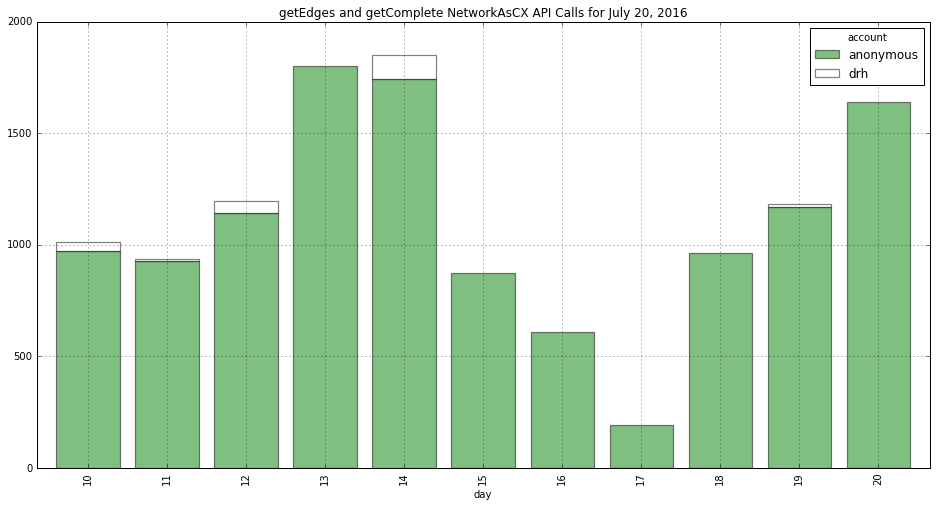

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

if dataFrame is None:
    print ('dataFrame is None')
elif dataFrame.empty:
    print ('Empty dataframe; nothing to plot')
else:
    dataFrame.plot(kind='bar', grid=True, colormap='ocean', alpha=0.5, figsize=(16,8), \
                   title='getEdges and getComplete NetworkAsCX API Calls for July 20, 2016', \
                   width=.8, linewidth=1.2, stacked=True)
    plt.xlabel(breakBy)


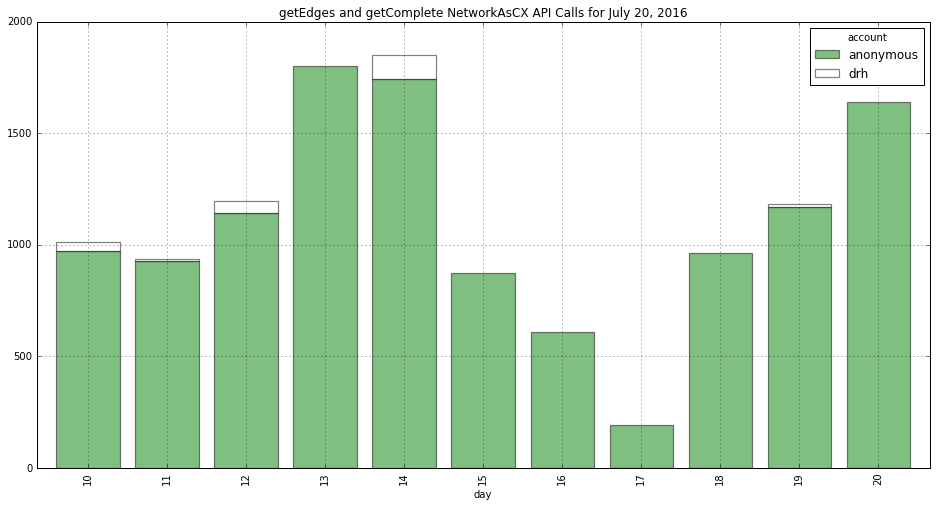

In [5]:
from eot import eventsOverTime

%matplotlib inline
import matplotlib.pyplot as plt


filter = {}
timeFrame = {}

#filter['primary'] = ['api']
#filter['api'] = ['NetworkAService.getEdges', \
#                 'NetworkAService.getCompleteNetworkAsCX', \
#                 'NetworkAService.queryNetwork', \
#                 'AdminService.getStatus', \
#                 'NetworkAService.getNetworkUserMemberships']


filter['primary'] = ['account']
filter['account'] = ['drh', 'anonymous']

#filter['account'] = ['drh', 'keiono', 'vrynkov', 'anonymous']
#filter['client_ip'] = ['137.110.55.22', '72.5.230.111']
timeFrame['month'] = '2016-07-20'
breakBy = 'day'

filter['transaction_type'] = ["INFO"]



dataFrame = eventsOverTime(filter, timeFrame, breakBy)

if dataFrame is None:
    print ('dataFrame is None')
elif dataFrame.empty:
    print ('Empty dataframe; nothing to plot')
else:
    dataFrame.plot(kind='bar', grid=True, colormap='ocean', alpha=0.5, figsize=(16,8), \
                   title='getEdges and getComplete NetworkAsCX API Calls for July 20, 2016', \
                   width=.8, linewidth=1.2, stacked=True)
    plt.xlabel(breakBy)
